# quora-text-classification-live-zaid
-download and explore data
- apply text classification techniques
-implement bag of words model
- train ML models for text classification
- make predictions and submit to kaggle
Use the "Run" button to execute the code.

##download and explore the data

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='.'

In [9]:
!chmod 600
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data

chmod: missing operand after ‘600’
Try 'chmod --help' for more information.
403 - Forbidden


In [15]:
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data

403 - Forbidden


In [10]:
train_fname='data/train.csv.zip'
test_fname='data/test.csv.zip'
sample_fname='data/sample_submission.csv.zip'

In [11]:
import pandas as pd

In [14]:
raw_df=pd.read_csv(train_fname)
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [ ]:
sincere_df=raw_df[raw_df.target==0] ##woh wala df deiga jiskay target sirf 0
sincere_df

In [16]:
sincere_df.question_text.values[:10] ##10 sawaal le aou

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [17]:
insincere_df=raw_df[raw_df.target==1]
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

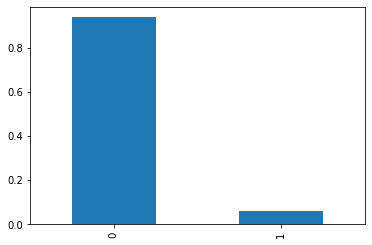

In [22]:
raw_df.target.value_counts(normalize=True).plot(kind='bar') 

In [58]:
samples=100_000
sample_df=raw_df.sample(samples,random_state=42)

In [27]:
q0=raw_df[raw_df.target==0].question_text.values[0]

In [28]:
q0

'How did Quebec nationalists see their province as a nation in the 1960s?'

In [29]:
q1=raw_df[raw_df.target==1].question_text.values[0]

In [30]:
q1

'Has the United States become the largest dictatorship in the world?'

In [34]:
 import nltk
 from nltk.tokenize import word_tokenize


In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [37]:
word_tokenize(q0)

['How',
 'did',
 'Quebec',
 'nationalists',
 'see',
 'their',
 'province',
 'as',
 'a',
 'nation',
 'in',
 'the',
 '1960s',
 '?']

In [38]:
q0_tok=word_tokenize(q0)
q1_tok=word_tokenize(q1)

In [42]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [43]:
english_stopwords=stopwords.words("english")

In [44]:
", ".join(english_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [46]:
def remove_stopwords(tokens):
  return[word for word in tokens if word.lower() not in english_stopwords]


In [47]:
q0_stp=remove_stopwords(q0_tok)

In [48]:
q0_stp

['Quebec', 'nationalists', 'see', 'province', 'nation', '1960s', '?']

In [49]:
q1_stp=remove_stopwords(q1_tok)
q1_stp

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

In [50]:
from nltk.stem.snowball import SnowballStemmer
stemmer =SnowballStemmer(language='english')

In [51]:
stemmer.stem('going')

'go'

In [52]:
q0_stm=[stemmer.stem(word) for word in q0_stp]

In [53]:
q0_stp

['Quebec', 'nationalists', 'see', 'province', 'nation', '1960s', '?']

In [55]:
q0_stm

['quebec', 'nationalist', 'see', 'provinc', 'nation', '1960s', '?']

In [56]:
q1_stm=[stemmer.stem(word) for word in q1_stp]

## text preprocessing techniques

##implement bag of words
     

In [59]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [60]:
small_df=sample_df[:5]

In [62]:
small_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0


In [63]:
 from sklearn.feature_extraction.text import CountVectorizer

In [65]:
small_vect=CountVectorizer()

In [68]:
small_vect.fit(small_df.question_text)

CountVectorizer()

In [70]:
small_vect.vocabulary_

{'what': 49,
 'is': 31,
 'the': 47,
 'most': 39,
 'effective': 16,
 'classroom': 9,
 'management': 37,
 'skill': 44,
 'technique': 46,
 'to': 48,
 'create': 11,
 'good': 23,
 'learning': 34,
 'environment': 17,
 'can': 7,
 'study': 45,
 'abroad': 1,
 'after': 2,
 '10th': 0,
 'class': 8,
 'from': 21,
 'bangladesh': 6,
 'how': 25,
 'make': 36,
 'friends': 20,
 'as': 5,
 'college': 10,
 'junior': 32,
 'do': 13,
 'download': 14,
 'free': 19,
 'apk': 4,
 'minecraft': 38,
 'pocket': 43,
 'edition': 15,
 'for': 18,
 'ios': 29,
 'iphone': 30,
 'like': 35,
 'kuvera': 33,
 'groww': 24,
 'also': 3,
 'online': 41,
 'investment': 28,
 'platform': 42,
 'where': 50,
 'invest': 27,
 'in': 26,
 'direct': 12,
 'mutual': 40,
 'funds': 22}

In [71]:
vectors=small_vect.transform(small_df.question_text)

In [72]:
vectors.shape

(5, 51)

In [73]:
stemmer =SnowballStemmer(language='english')

def tokenize(text):
  return[ word for word in word_tokenize(text)]


In [76]:
vectorizer=CountVectorizer(lowercase=True,
                           tokenizer=tokenize,
                           stop_words=english_stopwords,
                           max_features=1000)

In [77]:
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7feb262225e0>)

In [78]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'re", "'s", "'ve", '(', ')',
       '+', ',', '-', '.', '1', '10', '100', '11', '12', '12th', '15',
       '2', '20', '2017', '2018', '3', '30', '4', '5', '6', '7', '8', ':',
       ';', '?', '[', ']', '``', 'able', 'abroad', 'accept', 'access',
       'accomplishments', 'according', 'account', 'act', 'actually',
       'add', 'admission', 'adult', 'advanced', 'advantages', 'advice',
       'affect', 'africa', 'african', 'age', 'ago', 'air', 'allow',
       'allowed', 'almost', 'alone', 'along', 'already', 'also', 'always',
       'amazon', 'america', 'american', 'americans', 'among', 'amount',
       'analysis', 'ancient', 'android', 'animal', 'animals', 'anime',
       'another', 'answer', 'answers', 'anxiety', 'anyone', 'anything',
       'app', 'apple', 'application', 'apply', 'apps', 'area', 'army',
       'around', 'art', 'asian', 'ask', 'asked', 'attack'], dtype=object)

In [79]:
inputs=vectorizer.transform(sample_df.question_text)

In [80]:
inputs[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [82]:
test_df=pd.read_csv(test_fname)


test_inputs=vectorizer.transform(test_df.question_text)

## ml models for text classification

In [84]:
 from sklearn.model_selection import train_test_split


In [86]:
train_inputs,val_inputs,train_targets,val_targets=train_test_split(inputs,
                                                                   sample_df.target,test_size=0.3,random_state=42)

In [ ]:
 from sklearn.linear_model import LogisticRegression


##make predictions and submit to kaggle

In [23]:
print('Hello World')

Hello World
